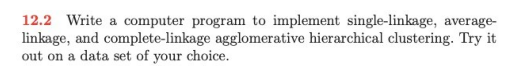

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('D:\MultivariateMethods\Homeworks\Pregunta12_2.jpg')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

In [1]:
# Importar las bibliotecas necesarias
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine


In [2]:
# Cargar el conjunto de datos Wine desde sklearn
wine = load_wine()
data = wine.data  # Usamos las características del conjunto de datos
target = wine.target  # Usamos las etiquetas verdaderas para comparación

# Convertir los datos a un DataFrame de pandas para una mejor visualización
df = pd.DataFrame(data, columns=wine.feature_names)
df['True_Label'] = target  # Añadimos la etiqueta verdadera para referencia

In [3]:
# Función para realizar clustering jerárquico aglomerativo
def hierarchical_clustering(data, method='single'):
    """
    Realiza clustering jerárquico aglomerativo en los datos proporcionados.
    
    Parámetros:
    - data: array o DataFrame, conjunto de datos a clusterizar.
    - method: str, método de vinculación a utilizar ('single', 'average', 'complete').
    
    Retorna:
    - clusters: array, etiquetas de clúster asignadas a cada punto de datos.
    """
    # Realizar el clustering usando el método especificado
    Z = linkage(data, method=method)
    
    # Dibujar el dendrograma
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram (Method: {method.capitalize()})')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
    
    # Asignar etiquetas de clúster (aquí se especifica 3 clústeres como ejemplo)
    clusters = fcluster(Z, 3, criterion='maxclust')
    return clusters

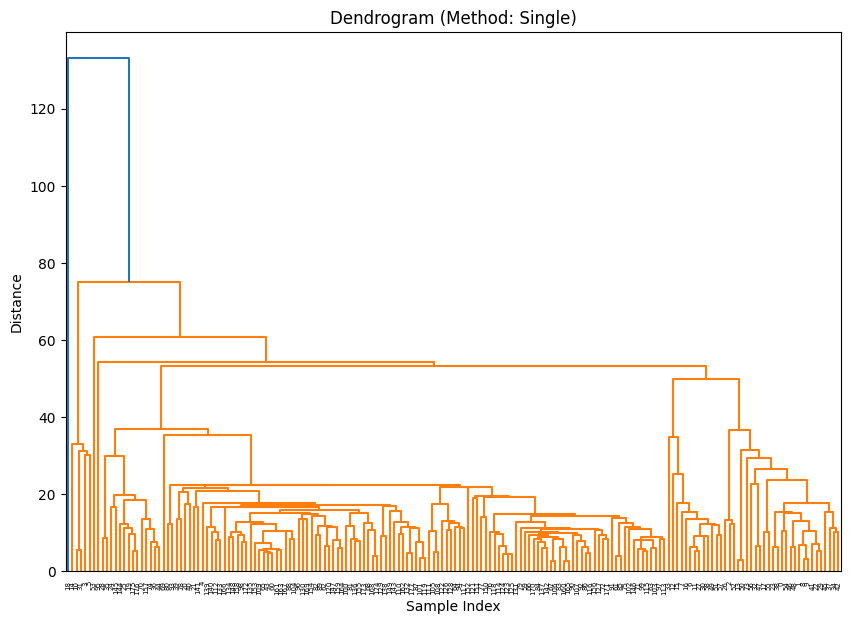

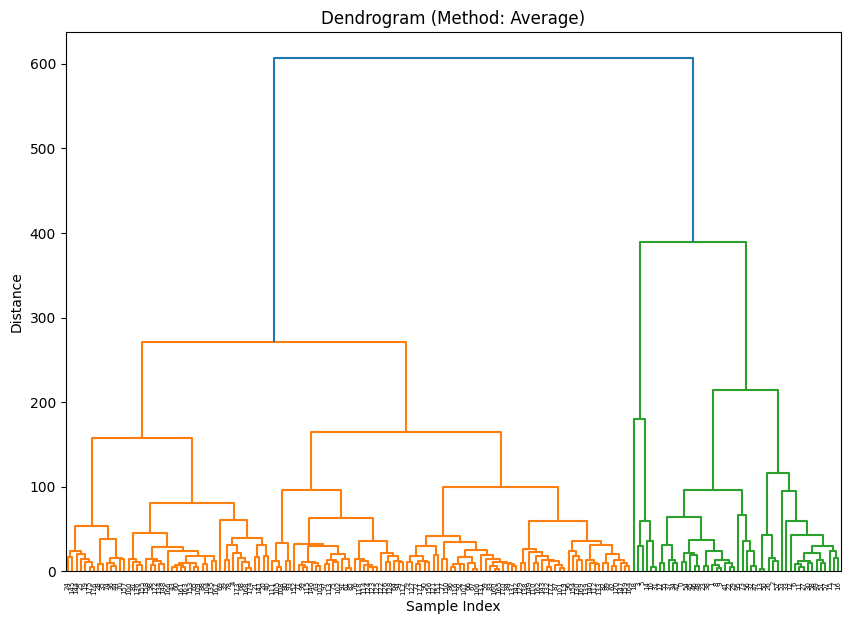

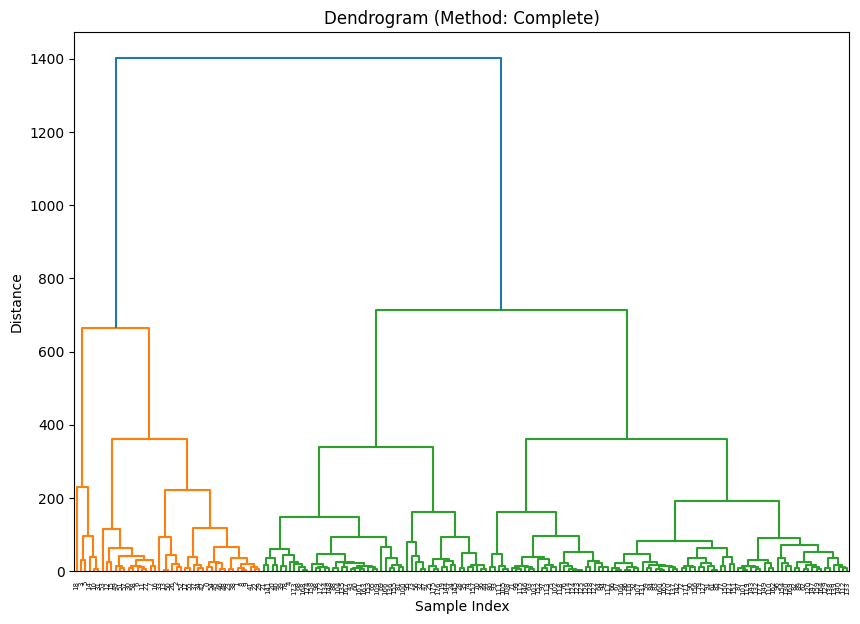

In [4]:
# Aplicar y visualizar el clustering usando single-linkage
single_clusters = hierarchical_clustering(data, method='single')
df['Single_Linkage_Cluster'] = single_clusters

# Aplicar y visualizar el clustering usando average-linkage
average_clusters = hierarchical_clustering(data, method='average')
df['Average_Linkage_Cluster'] = average_clusters

# Aplicar y visualizar el clustering usando complete-linkage
complete_clusters = hierarchical_clustering(data, method='complete')
df['Complete_Linkage_Cluster'] = complete_clusters

In [7]:
# Mostrar el DataFrame con los resultados de clustering
print("Hierarchical Clustering Results - Wine Dataset")
df.head()  # Mostrar las primeras filas del DataFrame

Hierarchical Clustering Results - Wine Dataset


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,True_Label,Single_Linkage_Cluster,Average_Linkage_Cluster,Complete_Linkage_Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2,3,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2,3,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,2,3,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1,2,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2,1,2
